In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm

In [2]:
#scaleddf is the prepared dataframe after using preprocessing.scale to scale the variables for unit variance
scaleddf = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/kmeansscaled.pkl')

In [3]:
#define columns to look at and test

# infocols = ['poet_name','poet_url','poet_poems_url','poet_bio','city','state','country','primary_tag','tags','tag2','tag3','tag4','poem_yrpub']
poemcols = ['poem_link', 'poem_title', 'title_clean','poem_text', 'sentences_x']
outcome = ['label', 'strlabel', 'poet_name', 'primary_tag', 'poem_link', 'text']

#EXCLUDE wordcount, wordcount_d, 'yrpub', 'numlines','numstanzas',
numerical = ['avgline_stanza','enj_score','ttr','abstraction_score', 'lesk_abs_score', 'pronoun_score', 
             'conjunction_ratio','nps_ratio','vps_ratio','aps_ratio','avg_nps_cscore',
             'avg_vps_cscore','avg_aps_cscore','1w_nps_fr','2w_nps_fr','3w_nps_fr']

In [4]:
#scaled
s_kdf = scaleddf[numerical]
s_odf = scaleddf[outcome]
len(scaleddf)

1287

##Let's run K means to figure out what my K is

In [5]:
X_s = s_kdf[numerical]
len(X_s)
for k in xrange(2,12):
    km = KMeans(n_clusters=k,init ='k-means++', random_state=1)
    km.fit(X_s)
    labels = km.labels_
    print k, metrics.silhouette_score(X_s, labels, metric='euclidean')

2 0.122424630226
3 0.127501541709
4 0.0868821226661
5 0.087791454135
6 0.0760572100069
7 0.0866832296056
8 0.0832696726553
9 0.0754745171005
10 0.077412557926
11 0.0723792499434


##After wrangling with changing the variables to use, I do not think that the data has any inherent structure because I can't improve the silhouette score

In [6]:
##JUST FOR KICKS LETS PLOT
type(X_s)
##change to array for plotting
Xx = X_s.as_matrix()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.12259083844422905)


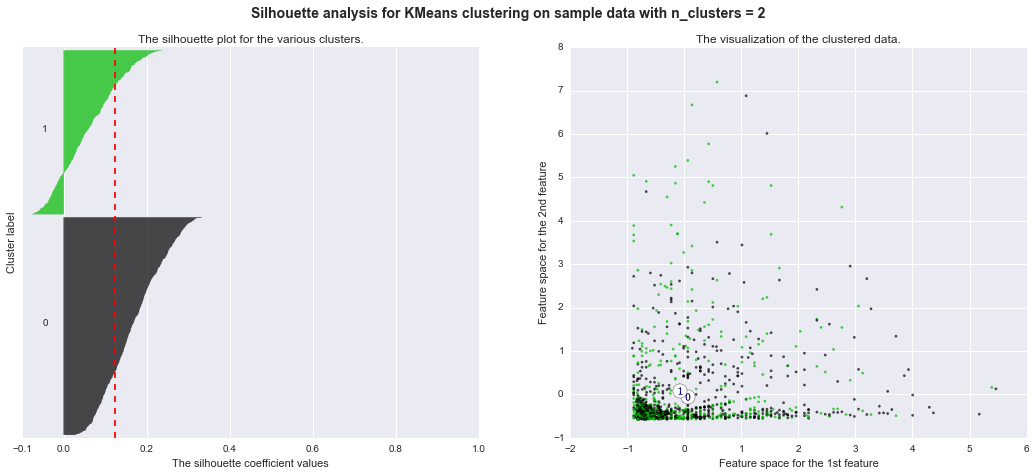

('For n_clusters =', 3, 'The average silhouette_score is :', 0.1252902010463538)


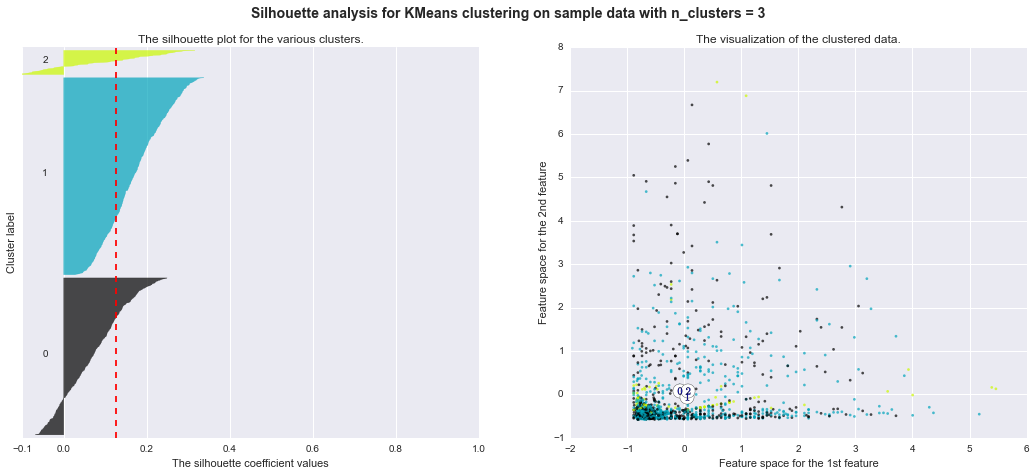

In [7]:
##THIS SECTION IS TAKEN FROM SKLEARN DEMO

range_n_clusters = [2, 3]
#                     , 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xx) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Xx)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(Xx, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(Xx, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xx[:, 0], Xx[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()